### ANALYSIS OF MTA SUBWAY JUPYTER NOTEBOOK ###


3. Is there a difference in service time between off-peak and peak service periods? -Rosania
    a. What influence does the number of passengers have with train punctuality?

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
MTA = pd.read_csv('data/MTA_Subway_Customer_Metrics_2020-2024.csv')

In [4]:
MTA.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [18]:
MTA["period"].str.contains('peak').value_counts()

period
True    2856
Name: count, dtype: int64

In [20]:
MTA["period"].str.contains('offpeak', na=False).value_counts()

period
True     1428
False    1428
Name: count, dtype: int64

In [12]:
MTA['period']

0       offpeak
1          peak
2       offpeak
3          peak
4       offpeak
         ...   
2851       peak
2852    offpeak
2853       peak
2854    offpeak
2855       peak
Name: period, Length: 2856, dtype: object

In [ ]:
MTA['period'] additional train time

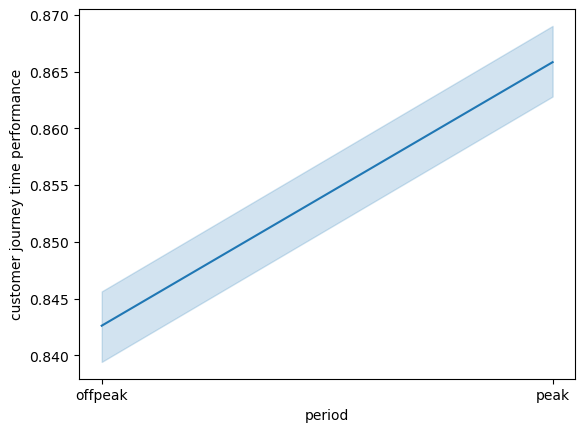

In [36]:
# Make 'period' a categorical type with a custom order
MTA["period"] = pd.Categorical(MTA["period"], categories=["offpeak", "peak"], ordered=True)

sns.lineplot(data=MTA, x="period", y="customer journey time performance")
plt.show()


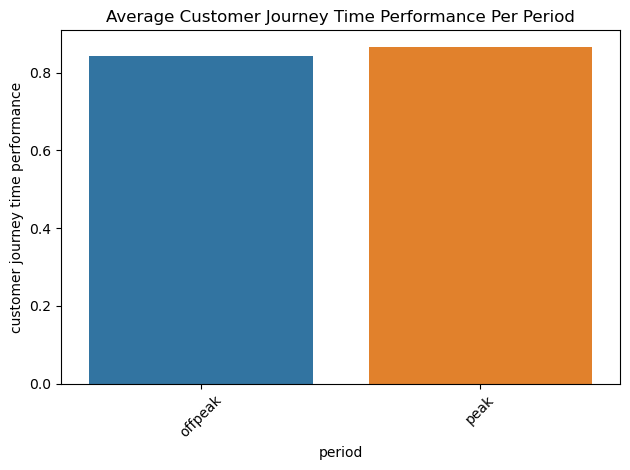

In [46]:
avg_per_period = MTA.groupby("period", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(
    data=avg_per_period,
    x="period",
    y="customer journey time performance",
    hue="period",           # assign hue
    palette="tab10",        # or any other palette
    legend=False            # hide legend since it's redundant
)

plt.title("Average Customer Journey Time Performance Per Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


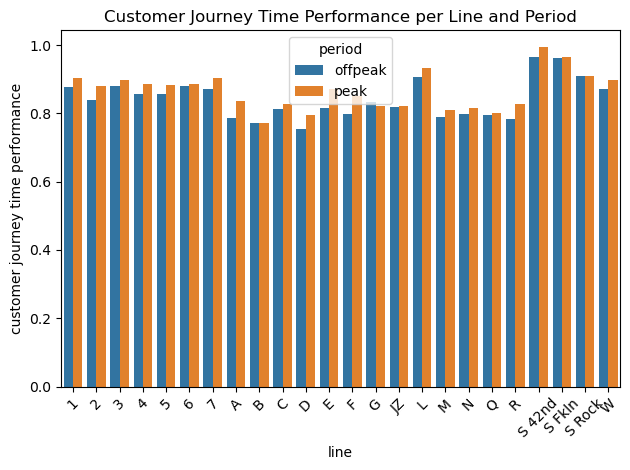

In [39]:
avg_per_line_period = MTA.groupby(["line", "period"], observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line_period, x="line", y="customer journey time performance", hue="period")
plt.title("Customer Journey Time Performance per Line and Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


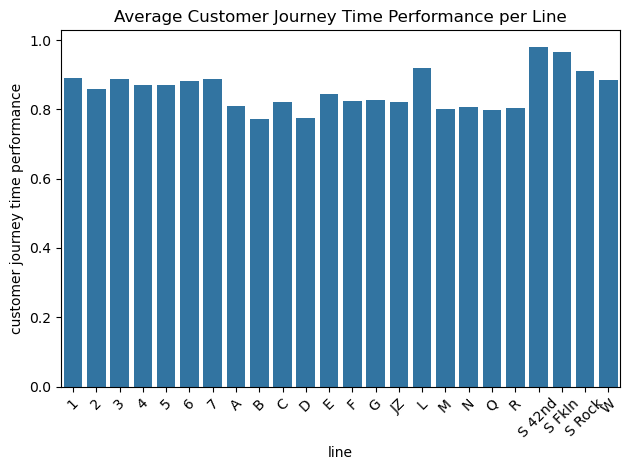

In [ ]:
avg_per_line = MTA.groupby("line", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line, x="line", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance per Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


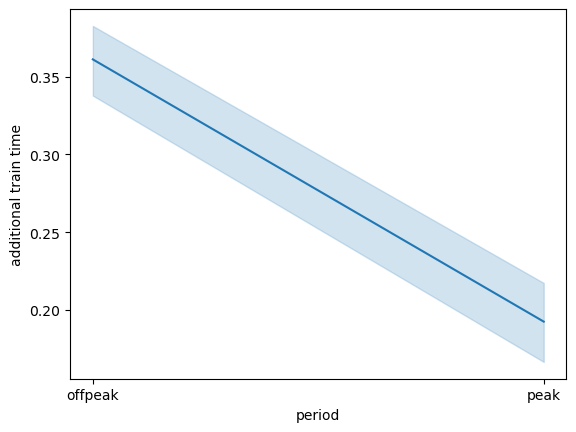

In [27]:
sns.lineplot(MTA, x="period", y="additional train time")
plt.show()

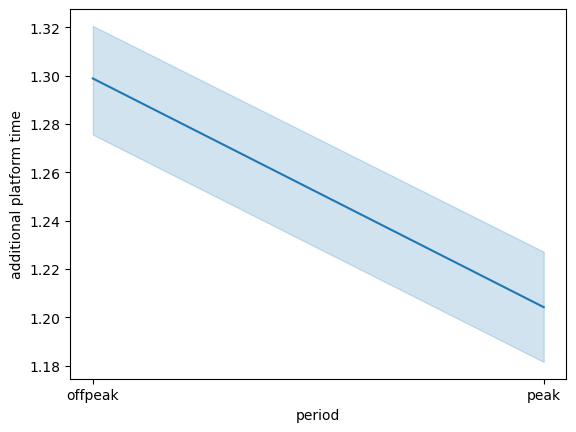

In [28]:
sns.lineplot(MTA, x="period", y="additional platform time")
plt.show()

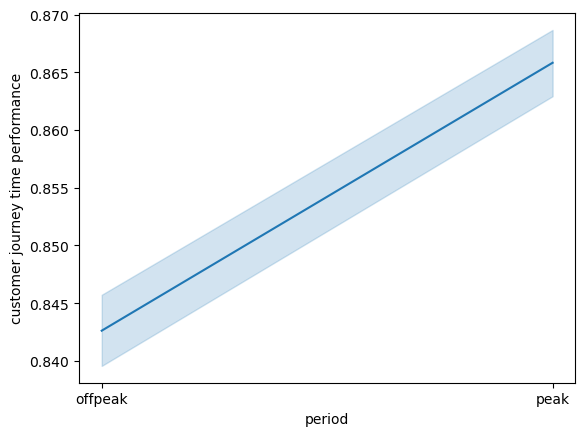

In [35]:
sns.lineplot(MTA, x="period", y="customer journey time performance")
plt.show()

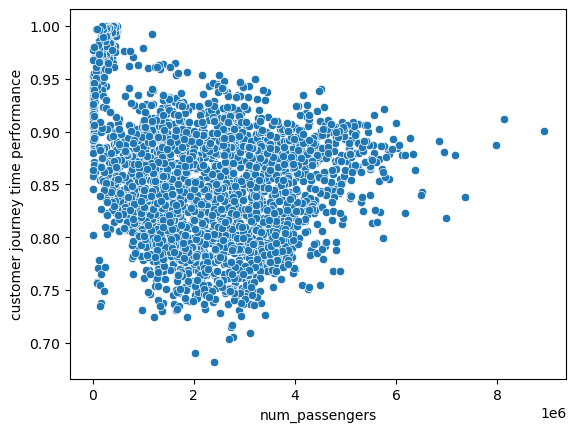

In [31]:
sns.scatterplot(MTA, x="num_passengers", y="customer journey time performance")
plt.show()

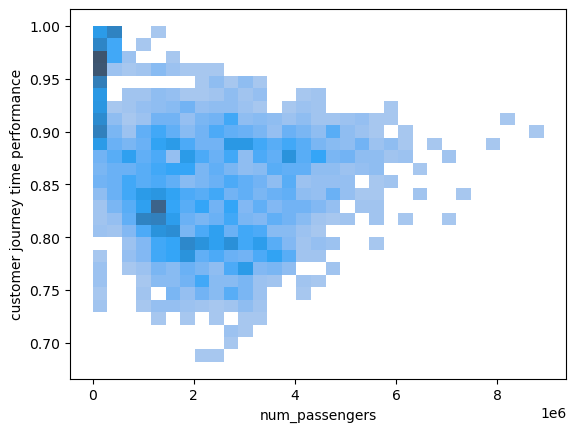

In [33]:
sns.histplot(MTA, x="num_passengers", y="customer journey time performance")
plt.show()